#### 以下是基于kaggle上 Titanic Data Science翻译
原文：https://www.kaggle.com/startupsci/titanic-data-science-solutions

本文档帮助我们了解类似kaggle这样网站上的竞赛问题的整个流程。已经有很多类似的文档说明如何进行竞赛，但是通常是专家为专家写的，忽略了很多细节。本文档是一个手把手的说明，会解释我们在选择某种方案的思路

# 流程与步骤

在 Datascience solution 这本书中，解决竞赛类的问题有以下7个步骤
1. 明确问题
2. 获取训练和测试数据
3. 清洗数据
4. 分析和发现模式，探索数据
5. 建模解决问题
6. 可视化结果和解决问题步骤
7. 提交结果

# 明确问题

像Kaggle这样的竞赛网站会提供训练数据和测试数据用来验证模型，同时会提出一个问题。比如Titanic的问题定义可以在https://www.kaggle.com/c/titanic 这里找到。
  
    已知有一份从Titanic事故中幸存或者遇难的乘客名单，能否定义一个模型根据测试数据提供的信息确定这些乘客是幸存还是遇难
我们可能还想知道关于这个问题的一些背景信息，以下是简单背景

   a. 1912年4月15日，泰坦尼克号在她的处女航行中撞到冰山，造成包括船员在内的2224乘客中的1502名丧生，幸存率只有32%。
   b. 损失如此严重的其中一个原因是船上没有足够的救生艇
   c. 尽管在这次沉船事故中幸存有幸运的因素，但是具有某些特征的群体要比另外一些幸存的概率更高，比如妇女、儿童和头等舱乘客
 
### 目标
 本文档致力于达成以下7个目标
 
####  分类 
  我们需要对测试数据进行分类，同时需要了解我们不同目标之间的关系
 #### 关联性
  人们可以根据训练数据中提供特征靠近问题，数据集中哪一个特征对结果影响最大，换成统计学的话来说就是是否存在一个特征与目标关联性强。当特征变化时结果也会随着正向或反向变化。这些对于类别性或者数值型的特征都可以测试出来。同时我们需要搞清楚特征之间的关联性。了解某个特征的关联性能帮助我们创造、去除或者修正特征。
#### 转换
在建模过程中，根据选择的模型，我们需要对特征值进行格式转换，比如将类别型转换成数值型

#### 完整
数据准备需要我们数据中任何找到隐藏的特征，这样模型效果会更好

#### 纠错
我们需要找到数据集中可能错误的数据或者不够准确的数据，并且尽量纠正这些错误。其中一个可行的方法时检测数据样本中所有的特征。

#### 创造 
我们能否通过现有的数据构建新的特征，这样新的特征会帮我们完成关联性、完整性目标

#### 图表
如何选择正确的图表进行可视化方式取决于数据和目标


In [1]:
#数据清洗
import pandas as pd
import numpy as np 
import random as rnd

#可视化
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

#机器学习模型
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import SGDClassifier,Perceptron,LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 获取数据
Python的Pandas包可以帮我们处理数据集，我们首先把数据转换成Pandas的DataFrames,我们会合并这些数据集，并用到相同的操作中


In [29]:
train_df = pd.read_csv("D:\\kaggle\\titanic\\train.csv")
test_df = pd.read_csv("D:\\kaggle\\titanic\\test.csv")
combine = [train_df,test_df]

### 通过描述数据分析

#### 数据集中有哪些特征？


In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### 哪些是类别型特征？
类别型：Survived, Sex, and Embarked. Ordinal: Pclass
#### 哪些是连续型型特征？
连续型：Age, Fare. 离散型: SibSp, Parch.
#### 哪些特征的数值是混合类型？

#### 哪些是特征中含有错误的值？

#### 哪些特征含有空格、Null和空值？

#### 各个特征的值类型是什么？


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

#### 连续值特征的值分布式什么样的？
对真正的连续值要分桶统计

In [28]:
print(train_df.describe())

train_df['Pclass'].value_counts()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 类别型特征值分布式什么样的？

In [20]:
#大写的 欧
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Reed, Mr. James George",male,347082,G6,S
freq,1,577,7,4,644


### 根据上面的分析，我们可以得到以下结论

#### 1. Fare值相差大，最小0，最大512
#### 2. 女性占比超65%，港口S 占72%
#### 3. 姓名是唯一的，Cabin有很多重复值

### 接下来，我们将从以下几个方面继续分析数据
#### 1. 关联关系
分析每个特征与能否幸存的关联性
#### 2. 填充值
我们会对年龄和港口特征进行值填充，因为这两个特征与能否幸存有比较大的关联关系
#### 3. 纠正特征
a. 每个人的姓名、票号、乘客ID都不一样，对结果没有意义，去除
b. Cabin的饱和度过低，去除
#### 4. 创建新特征
a. 根据姓名的姓氏作为特征
b. 将父母数和兄弟姐妹数整合起来作为新的特征
c. 对年龄和Fare进行分桶


### 对Pclass 性别 SibSp 分析与是否幸存的关联性

In [41]:
print(train_df[['Pclass','Survived']].groupby('Pclass',as_index = False).mean())
print("-"*50)
print(train_df[['Sex','Survived']].groupby('Sex',as_index = False).mean())
print("-"*50)
print(train_df[['SibSp','Survived']].groupby('SibSp',as_index = False).mean())
print("-"*50)
print(train_df[['Parch','Survived']].groupby('Parch',as_index = False).mean())


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
--------------------------------------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
--------------------------------------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
--------------------------------------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


### 对分析结果可视化

### 分析连续值与是否幸存的关联性

直方图对那些连续值与幸存的关联关系非常适合，工具在画图时会自动给数据一个分桶值，注意x-asis在直方图中表示样本数


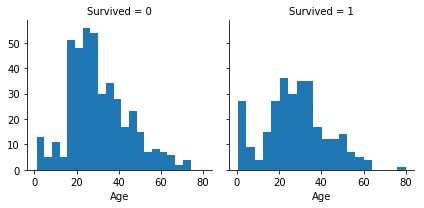

In [6]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

####  关联数值型和有序的特征
我们可以通过一个简单的图来合并多个特征来判断关联关系，这个可以由数值型和数字组成的类别型特征完成。


#### 观察.
舱位等级为3 的乘客占了大部分,然后大多数没有幸存.而1等仓和二等仓的乘客大部分幸存，进一步证实了我们猜想。我们来看看各个舱位乘客的年龄分布。


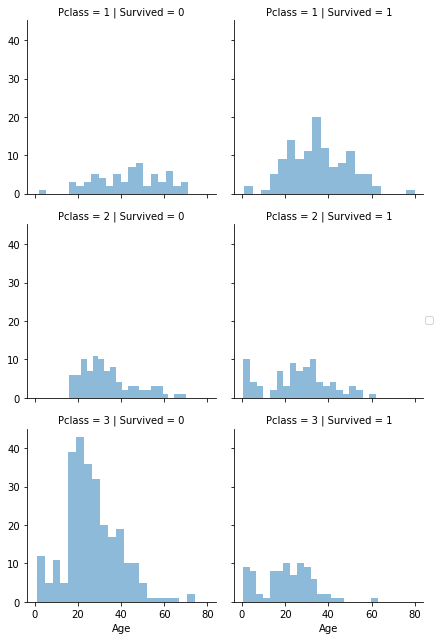

In [11]:
g = sns.FacetGrid(train_df,row='Pclass', col= 'Survived')
g.map(plt.hist,"Age",alpha=.5,bins=20)
g.add_legend()

#### 关联类别型特征
现在我们可以关联类别型的特征

#### 观察结果.

女性比男性有高得多的存活率。
Embarked为C时，男性的存活率更高，这可能跟舱位等级有关系。

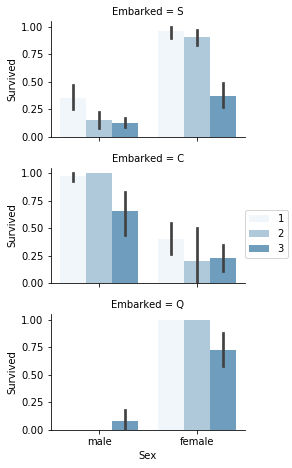

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked',  size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Survived','Pclass',  alpha=.7)
grid.add_legend()

#### 关联类型数据和数值型数据（x轴是类别型数据)
Correlating categorical and numerical features

接下来我们会比较类别型（非数值）特征和数值型特征，比如 Embarked,性别，是否幸存与票价关系


#### 观察
票价更高的乘客幸存概率更大

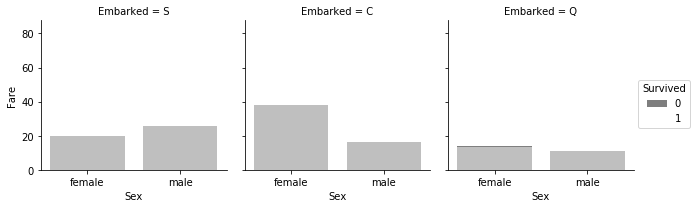

In [19]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
# grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## 特征整理
到目前为止，我们已经证实了一些结论，但是还没有修改、删除或新增特征，现在为了达到训练目标，我们将开始如下操作。

#### 删除特征
通过删除特征我们可以加快分析过程，基于我们上面得到的假设我们想要删除 Cabin和Ticket两个特征
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

记得将训练集和测试集做相同的处理


In [30]:
train_df = train_df.drop(["Cabin","Ticket"],axis=1)
test_df = test_df.drop(["Cabin","Ticket"],axis=1)
combine = [train_df, test_df]

### 从现有特征中创建新特征

接下来我们用正则表达式抽取姓名中的姓氏，然后删除Name这个特征

In [31]:
for df in combine:
    df["Title"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


从上面的结果中我们可以看到一些不常用的称呼，我们把这些称呼用"Rare"代替

In [37]:
for df in combine:
    df["Title"]=df["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
#pd.crosstab(train_df['Title'], train_df['Sex'])   
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


现在我们可以去掉Name和 PassengeId 特征

In [41]:
train_df = train_df.drop(["PassengerId","Name"],axis=1)
test_df = test_df.drop(["PassengerId","Name"],axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


#### 将类别型特征转换成数字型

性别中 male 为0 female 为1

In [43]:
sex_mapping = {"female": 1, "male": 0}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping).astype(int)
    dataset['Sex'] = dataset['Sex'].fillna(0)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 将数值型的特征补充完整

年龄特征中有一些是na值，我们从下面三种方法种选一种：

1. 随机填一个数
2. 填年龄的平均值，
取平均值时我们可以与其他特征关联，比如Pclass为1，性别为1 这类型的取一个平均值，Pclass为1 性别为0 这类型再取一个平均值
然后填充到相应类别中
3. 1 和2 的结合
先分组，然后不是取平均值，而是根据标准差和平均值取一个随机数

1和3 会带来随机噪声，导致多次运行模型结果不一致，这里我们用第二种方法


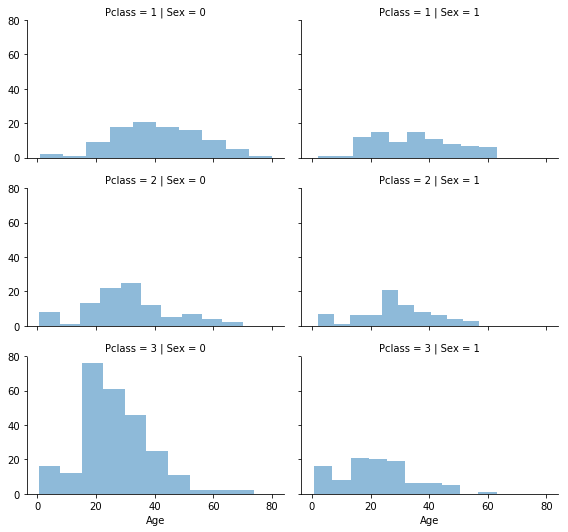

In [52]:
g = sns.FacetGrid(train_df,row="Pclass",col="Sex",size=2.5,aspect=1.6)
g.map(plt.hist,"Age",alpha=.5)

In [84]:
# 先建一个数组，存储每种类型的年龄
guess_age = np.zeros((2,3))


for df in combine:
    # 找到每一种类型的平均值，并存入guess_age中
    for i in range(2):
        for j in range(3):
            tmp = df[(df["Pclass"] == j+1) & (df["Sex"] == i)]["Age"].dropna()
            guess_age[i,j] = tmp.median()
        
   # 把guess_age的值设定到 age为null的数据集中     
    for i in range(2):
        for j in range(3):
             df.loc[(df["Pclass"] == j+1) & (df["Sex"] == i) & (df.Age.isnull()),"Age"] = guess_age[i,j]
    
    df['Age'] = df['Age'].astype(int)
        

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


对填充后的年龄进行分桶


In [86]:
pd.cut(train_df["Age"],5)

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: Age, dtype: int64

根据分桶界限，将Age的值替换为相应的分桶区间

In [87]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


#### 通过合并现有特征创造新的特征
我们可以通过合并兄弟姐妹数（SibSp）和 父母子女数(Parch）创建一个新的家庭人数的特征

In [96]:
for df in combine:
    df["FamillySize"] =  df["SibSp"]+df["Parch"]+1

train_df.groupby("FamillySize").mean()[["Survived"]]

,Survived
FamillySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


我们再根据家庭人数是不是为1判断乘客是单独一个人还是跟其他家庭成员一起


In [98]:
for df in combine:
    df["isAlone"] = 0
    df.loc[ df["FamillySize"]==1,"isAlone"]=1
    
train_df.groupby("isAlone").mean()[["Survived"]]

,Survived
isAlone,
0,0.505650
1,0.303538


In [ ]:
isAlone看起来有更好的区分度，我们去掉SibSp,Parch,FamillySize三个特征

In [102]:
train_df = train_df.drop(["SibSp","Parch","FamillySize"],axis=1)
test_df = test_df.drop(["SibSp","Parch","FamillySize"],axis=1)
combine = [train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


我们还可以人为的创造一个特征
用Pclass 乘 Age的分区

In [103]:
for df in combine:
    df["Pclass*Age"] = df.Pclass * df.Age
    
train_df.head()   

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Pclass*Age
0,0,3,0,1,7.2500,S,1,0,3
1,1,1,1,2,71.2833,C,3,0,2
2,1,3,1,1,7.9250,S,2,1,3
3,1,1,1,2,53.1000,S,3,0,2
4,0,3,0,2,8.0500,S,1,1,6


将类别型的特征补充完整，我们的Embarked特征还有两个空值
可以通过 train_df.info() 查看

In [109]:
#查看最多
#train_df.Embarked.dropna().value_counts()

guess_embak = train_df.Embarked.dropna().mode()[0]
for df in combine:
    df.loc[df["Embarked"].isnull(),"Embarked"] = guess_embak
    #df["Embarked"] = df.loc["Embarked"].fillna(guess_embak)

把类别型转换成数字
embar_map = {"S":1,"C":2,"Q":3}

In [115]:
embar_map = {"S":1,"C":2,"Q":3}
for df in combine:
    df["Embarked"] = df["Embarked"].map(embar_map)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Pclass*Age
0,0,3,0,1,7.2500,1,1,0,3
1,1,1,1,2,71.2833,2,3,0,2
2,1,3,1,1,7.9250,1,2,1,3
3,1,1,1,2,53.1000,1,3,0,2
4,0,3,0,2,8.0500,1,1,1,6


测试集中有一个Fare数据为nan，快速填充一个平均值

In [121]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()
# 对Fare值进行分桶处理


train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [122]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Pclass*Age
0,0,3,0,1,0,1,1,0,3
1,1,1,1,2,3,2,3,0,2
2,1,3,1,1,1,1,2,1,3
3,1,1,1,2,3,1,3,0,2
4,0,3,0,2,1,1,1,1,6
5,0,3,0,1,1,3,1,1,3
6,0,1,0,3,3,1,1,1,3
7,0,3,0,0,2,1,4,0,0
8,1,3,1,1,1,1,3,0,3
9,1,2,1,0,2,2,3,0,0
